In [1]:
import yfinance as yf
import pandas as pd
import numpy as np

In [155]:

ticker = 'TSLA'
df = yf.download(ticker)
df.index = pd.to_datetime(df.index)
df = df.droplevel('Ticker', axis=1)
df

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2010-06-29 00:00:00+00:00,1.592667,1.592667,1.666667,1.169333,1.266667,281494500
2010-06-30 00:00:00+00:00,1.588667,1.588667,2.028000,1.553333,1.719333,257806500
2010-07-01 00:00:00+00:00,1.464000,1.464000,1.728000,1.351333,1.666667,123282000
2010-07-02 00:00:00+00:00,1.280000,1.280000,1.540000,1.247333,1.533333,77097000
2010-07-06 00:00:00+00:00,1.074000,1.074000,1.333333,1.055333,1.333333,103003500
...,...,...,...,...,...,...
2024-11-13 00:00:00+00:00,330.239990,330.239990,344.600006,322.500000,335.850006,125405600
2024-11-14 00:00:00+00:00,311.179993,311.179993,329.980011,310.369995,327.690002,120726100
2024-11-15 00:00:00+00:00,320.720001,320.720001,324.679993,309.220001,310.570007,114440300


In [156]:
df["change_tomorrow"] = df["Close"].pct_change(-1)*100


In [157]:
# and look back a few days
columns_to_lag = ['Open','Close','High','Low', 'Volume', 'Adj Close']
days_to_lag = 5

## add columns looking back up to five days
## add columns giving Adj Close change compared to 1, 2, 3, 4 and 5 days back

for lag in range(1, days_to_lag + 1):
    df[f"change_back_{lag}"] = df["Adj Close"].pct_change(lag)
    for col in columns_to_lag[::-1]:
        df[f"{col}_lag{lag}"] = df[col].shift(lag)

In [158]:
df = df.dropna().copy()


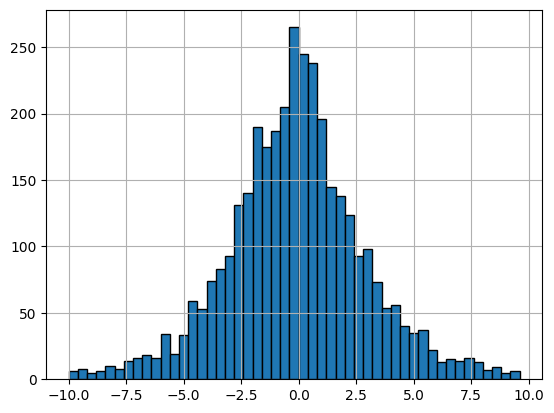

In [159]:
bins = np.arange(-10,10,.4)
df.change_tomorrow.hist(bins=bins, edgecolor='black');

In [160]:
df["change_tomorrow_direction"] = df.change_tomorrow.apply(lambda v: "UP" if v>0 else "DOWN")
df

Price,Adj Close,Close,High,Low,Open,Volume,change_tomorrow,change_back_1,Adj Close_lag1,Volume_lag1,...,Close_lag4,Open_lag4,change_back_5,Adj Close_lag5,Volume_lag5,Low_lag5,High_lag5,Close_lag5,Open_lag5,change_tomorrow_direction
Date,,,,,,,,,,,,,,,,,,,,,
2010-07-07 00:00:00+00:00,1.053333,1.053333,1.108667,0.998667,1.093333,103825500,-9.507473,-0.019243,1.074000,103003500.0,...,1.588667,1.719333,-0.338636,1.592667,281494500.0,1.169333,1.666667,1.592667,1.266667,DOWN
2010-07-08 00:00:00+00:00,1.164000,1.164000,1.168000,1.038000,1.076000,115671000,0.344833,0.105064,1.053333,103825500.0,...,1.464000,1.666667,-0.267310,1.588667,257806500.0,1.553333,2.028000,1.588667,1.719333,UP
2010-07-09 00:00:00+00:00,1.160000,1.160000,1.193333,1.103333,1.172000,60759000,2.052752,-0.003436,1.164000,115671000.0,...,1.280000,1.533333,-0.207650,1.464000,123282000.0,1.351333,1.728000,1.464000,1.666667,UP
2010-07-12 00:00:00+00:00,1.136667,1.136667,1.204667,1.133333,1.196667,33037500,-6.008761,-0.020115,1.160000,60759000.0,...,1.074000,1.333333,-0.111979,1.280000,77097000.0,1.247333,1.540000,1.280000,1.533333,DOWN
2010-07-13 00:00:00+00:00,1.209333,1.209333,1.242667,1.126667,1.159333,40201500,-8.568601,0.063929,1.136667,33037500.0,...,1.053333,1.093333,0.126008,1.074000,103003500.0,1.055333,1.333333,1.074000,1.333333,DOWN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-12 00:00:00+00:00,328.489990,328.489990,345.839996,323.309998,342.739990,155726000,-0.529918,-0.061457,350.000000,210521600.0,...,288.529999,284.670013,0.306435,251.440002,69282500.0,246.210007,255.279999,251.440002,247.339996,DOWN
2024-11-13 00:00:00+00:00,330.239990,330.239990,344.600006,322.500000,335.850006,125405600,6.125072,0.005327,328.489990,155726000.0,...,296.910004,288.890015,0.144560,288.529999,165228700.0,275.619995,289.589996,288.529999,284.670013,UP
2024-11-14 00:00:00+00:00,311.179993,311.179993,329.980011,310.369995,327.690002,120726100,-2.974560,-0.057716,330.239990,125405600.0,...,321.220001,299.140015,0.048062,296.910004,117309200.0,285.519989,299.750000,296.910004,288.890015,DOWN


In [185]:
dftrain = df.loc["2006-12-01":"2022-12-31",:].copy().drop(columns=["change_tomorrow","change_tomorrow_direction"])
dftest =  df.loc["2023-01-01":,:].copy().drop(columns=["change_tomorrow","change_tomorrow_direction"])

In [186]:
ttrain = df.loc["2006-12-01":"2022-12-31","change_tomorrow"].copy()
ttest  = df.loc["2023-01-01":,"change_tomorrow"].copy()

In [187]:
from sklearn.tree import DecisionTreeRegressor

In [188]:
model_dt = DecisionTreeRegressor(max_depth=50)
model_dt.fit(X=dftrain, y=ttrain)

DecisionTreeRegressor(max_depth=50)

In [189]:
from sklearn.tree import plot_tree
#plot_tree(decision_tree=model_dt);

In [190]:
ptrain = model_dt.predict(X=dftrain)
ptest = model_dt.predict(X=dftest)

In [191]:
print(f"MSE training: {(ptrain-ttrain).apply(lambda x: x*x).mean()}")
print(f"MSE test: {(ptest-ttest).apply(lambda x: x*x).mean()}")

MSE training: 0.4294518734644614
MSE test: 26.85090406808256


In [192]:
from backtesting import Backtest, Strategy

In [193]:
class Regression(Strategy):
    def init(self):
        self.model = model_dt
        self.already_bought = False

    def next(self):
        explanatory_today = self.data.df.iloc[[-1],:]
        forecast_tomorrow = self.model.predict(explanatory_today)[0]
        
        # conditions to sell or buy
        if forecast_tomorrow >0 and self.already_bought == False:
            self.buy()
            self.already_bought = True
        elif forecast_tomorrow <0 and self.already_bought == True:
            self.sell()
            self.already_bought = False 
        else:
            pass

In [194]:
bt = Backtest(data=dftest, strategy=Regression,
              cash=10000, commission=.002, exclusive_orders=True)

In [195]:
results = bt.run()

In [196]:
results[:"Return [%]"]

Start                2023-01-03 00:00:00+00:00
End                  2024-11-18 00:00:00+00:00
Duration                     685 days 00:00:00
Exposure Time [%]                    99.577167
Equity Final [$]                    755.733009
Equity Peak [$]                        10000.0
Return [%]                           -92.44267
dtype: object

In [197]:
ptrain = model_dt.predict(dftrain)
ptest = model_dt.predict(dftest)

In [198]:
import matplotlib.pyplot as plt

(-3.0, 3.0)

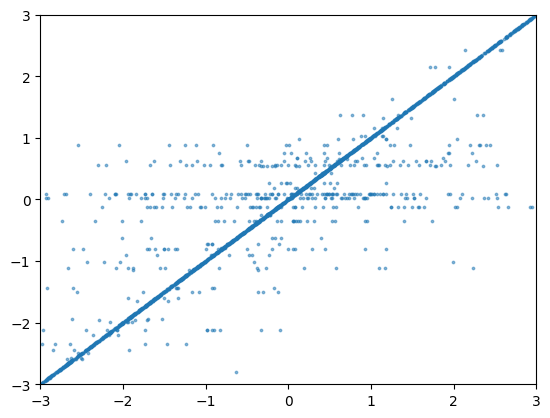

In [201]:
plt.scatter(ttrain, ptrain, s=3, alpha=.5)
plt.xlim(-3,3)
plt.ylim(-3,3)

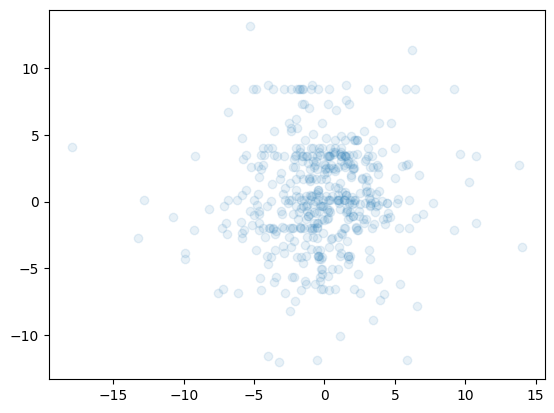

In [202]:
plt.scatter(ttest, ptest, alpha=0.1)
# plt.xlim(-3,3)
# plt.ylim(-3,3)